***
# **<font color=darkblue size=10>Data Science Project</font>**
***

## **Project Title**

**International football analysis from 1872 to 2022**

## **Members**

- Alexandre Bezerra de Lima (@Alexandreprog)
- Gustavo Montenegro Maia (@guga06436)
- Ryann Carlos de Arruda Quintino (@ryann-arruda)

## **Introduction**

In this data science analysis, we explore a dataset of international football matches. Using the knowledge acquired during the data science classes, we aim to uncover patterns, trends, and valuable insights from the data. Our objectives include understanding teams performances, stats across ages, identifying success factors, group teams based on their historical performance and developing predictive models.

Those were the main questions that we initially wanted to answer:
1. What is the penalty goal rate per year?
2. What is the rate of goals scored per minute of the match?
3. Which team has won the most penalty shootouts?
4. What is the influence of playing at home on the final result?
5. What are the best teams historically?
6. What is the performance of teams in official matches?

After some thought, the questions became:
1. What is the penalty goal rate per year?
2. What is the goal rate per year?
3. What is the rate of goals scored per minute of the match?
4. Which team has won the most penalty shootouts?
5. What is the influence of playing at home on the final result?
6. What are the best teams historically?
7. What is the distribution of goals scored during major international tournaments?

# **Dependencies**

The pandas, numpy, seaborn, matplotlib, sklearn and scipy libraries were used for data analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import linregress

# **Deafult Settings**

Some general settings used on the notebook

In [2]:
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set()

# Seed constant used in project
MYSEED = 42

In [3]:
%%html
<style>
table {float:left}
</style>

# **<font color=darkblue>PROJECT DATASET</font>**
***

### **International football results from 1872 to 2022**

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

### **Variables used**

#### results.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|home_score|full-time home team score including extra time, not including penalty-shootouts|
|away_score|full-time away team score including extra time, not including penalty-shootouts|
|tournament|the name of the tournament|
|city|the name of the city/town/administrative unit where the match was played|
|country|the name of the country where the match was played|
|neutral|TRUE/FALSE column indicating whether the match was played at a neutral venue|

#### shootouts.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|winner|winner of the penalty-shootout|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|team|name of the team scoring the goal|
|minute|minute of the goal scored|
|scorer|name of the player scoring the goal|
|own_goal|whether the goal was an own-goal|
|penalty|whether the goal was a penalty|

### **Variables created bellow**

#### results.csv

|Variable|Description|
|:---|:---|
|goal_dif|difference between home_score and away_score|
|total_gols|sum between home_score and away_score|
|year|year of the game|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|year|year of the match|

# **Loading Dataset Files**

This dataset is made up of three csv files and their descriptions are provided below.

* goalscorers: goals scored and details about them
* shootouts: resultsof penalty shootouts
* results: results of international matches.

In [4]:
goalscorers = pd.read_csv('goalscorers.csv')
shootouts = pd.read_csv('shootouts.csv')
results = pd.read_csv('results.csv')

# **Process Datasets**

## results.csv

Updates made:

1. A new column, "goal_dif," was created to capture the goal difference in each match.
2. Another column, "total_goals," was added to represent the total number of goals scored in each match.
3. The data type of the date column was converted to datetime format for better time-based analysis.
4. A new column, "year," was introduced to the dataset, allowing for easy analysis and grouping based on specific years.

In [5]:
# Create a goal_dif column
results['goal_dif'] = results['home_score'] - results['away_score']
# Create a total_goals column
results['total_goals'] = results['home_score'] + results['away_score']
# Change type of date column to datetime
results['date'] = pd.to_datetime(results.date)
# Add column year
results['year'] = results.date.map(lambda x: x.year)
results.head(15)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_dif,total_goals,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4,4,1876
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-2,4,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-2,2,1877
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,5,9,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,9,9,1878


## shootouts.csv

In [6]:
shootouts.head(15)

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
5,1973-04-21,Senegal,Ghana,Ghana
6,1973-06-14,Guinea,Mali,Guinea
7,1973-06-14,Mauritius,Tanzania,Mauritius
8,1973-07-26,Malaysia,Kuwait,Malaysia
9,1973-07-26,Cambodia,Singapore,Singapore


## goalscores.csv

Updates made:
1. The data type of the date column was changed to datetime for improved time-related analysis.
2. A new column, "year," was added to the dataset, enabling easy grouping and analysis based on specific years.

In [7]:
# Change type of date column to datetime
goalscorers['date'] = pd.to_datetime(goalscorers.date)
# Add column year
goalscorers['year'] = goalscorers.date.map(lambda x: x.year)
goalscorers.head(5)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916


# **Data Exploration**

## **results dataset**

### **Measures of Central Tendency**

#### **Mean**

In [8]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].mean().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,1992.095787,1.739278,1.178401,0.560877,0.248603


#### **Median**

In [9]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].median().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,1999.0,1.0,1.0,0.0,0.0


#### **Mode**

In [10]:
cols = ['year', 'home_team', 'away_team', 'home_score', 'away_score', 'goal_dif', 'tournament', 'city', 'country', 'neutral']
results[cols].mode()

,year,home_team,away_team,home_score,away_score,goal_dif,tournament,city,country,neutral
0,2019,Brazil,Uruguay,1,0,0,Friendly,Kuala Lumpur,United States,False


### **Dispersion Measures**

#### **Standard Deviation**

In [11]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].std().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,24.62302,1.747263,1.393775,2.381203,0.432208


#### **Variance**

In [12]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].var().to_frame().T

,year,home_score,away_score,goal_dif,neutral
0,606.293096,3.052926,1.942609,5.670126,0.186804


### **Boxplots**

**Observation:** In the graphs that analyze the `home_score`, `away_score` and `goal_dif` variables, the values whose modulus was above 8 were simplified to facilitate the comparison.

#### **year**

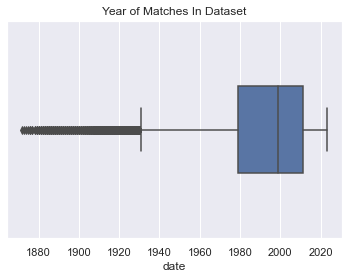

In [13]:
# Visualization Settings
ax = sns.boxplot(data=results, x=results.date.map(lambda x: x.year), width=0.4, orient='h')
ax.set_title("Year of Matches In Dataset")


# Show
plt.show()

#### **home_score and away_score**

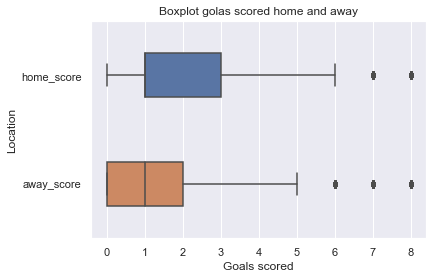

In [14]:
# Create copy of results DataFrame
match_score = results[['home_score', 'away_score', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 8 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_home = match_score.home_score > max_number_of_goals
mask_number_of_goals_away = match_score.away_score > max_number_of_goals

match_score.home_score = match_score.home_score.where(~mask_number_of_goals_home, max_number_of_goals)
match_score.away_score = match_score.away_score.where(~mask_number_of_goals_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score[['home_score', 'away_score']][mask_field],
            width=0.4, orient='h')
ax.set_ylabel("Location")
ax.set_xlabel("Goals scored")
ax.set_title("Boxplot golas scored home and away")

# Show
plt.show()

#### **goal_dif**

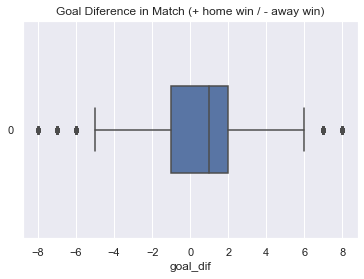

In [15]:
# Create copy of results DataFrame
match_score = results[['goal_dif', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 7 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_dif_home = match_score.goal_dif > max_number_of_goals
mask_number_of_goals_dif_away = match_score.goal_dif < -max_number_of_goals

match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_home, max_number_of_goals)
match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score['goal_dif'][mask_field],
            width=0.4, orient='h')
ax.set_xlabel("goal_dif")
ax.set_title("Goal Diference in Match (+ home win / - away win)")

# Show
plt.show()

## **goalscores dataset**

### **Measures of Central Tendency**

#### **Mean**

In [16]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].mean().to_frame().T

,minute,own_goal,penalty
0,50.019166,0.017509,0.065475


#### **Median**

In [17]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].median().to_frame().T

,minute,own_goal,penalty
0,51.0,0.0,0.0


#### **Mode**

In [18]:
cols = ['home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']
goalscorers[cols].mode()

,home_team,away_team,team,scorer,minute,own_goal,penalty
0,Brazil,Uruguay,Brazil,Cristiano Ronaldo,90.0,False,False


### **Dispersion Measures**

#### **Standard Deviation**

In [19]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].std().to_frame().T

,minute,own_goal,penalty
0,26.360859,0.131159,0.247365


#### **Variance**

In [20]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].var().to_frame().T

,minute,own_goal,penalty
0,694.894894,0.017203,0.06119


### **Boxplots**

#### **minute**

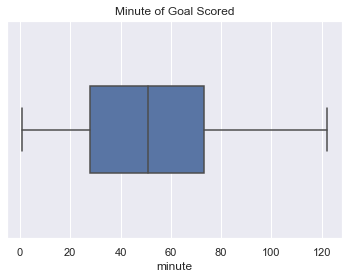

In [21]:
# Visualização
ax = sns.boxplot(data=goalscorers, x='minute', width=0.4, orient='h')
ax.set_title("Minute of Goal Scored")


# Show
plt.show()

## **shootouts dataset**

### **Measures of Central Tendency**

#### **Mean**

As this dataframe does not have numerical values, it isn't possible to calculate the average.

#### **Median**

As this dataframe does not have numerical values, it isn't possible to calculate the median.

#### **Mode**

In [22]:
shootouts[['home_team', 'away_team', 'winner']].mode()

,home_team,away_team,winner
0,South Africa,Uganda,Argentina
1,Zambia,NaN,NaN


### **Dispersion Measures**

#### **Standard Deviation**

As this dataframe does not have numerical values, it isn't possible to calculate the standard deviation.

#### **Variance**

As this dataframe does not have numerical values, it isn't possible to calculate the variance.

### **Boxplots**

#### **winner_count**

Checks the absolute frequency of penalty shootout wins by team

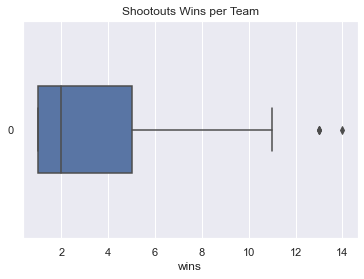

In [23]:
# Visualization
ax = sns.boxplot(data=shootouts.winner.value_counts(), width=0.4, orient='h')
ax.set_title("Shootouts Wins per Team")
ax.set_xlabel('wins')

# Show
plt.show()

# **Questions**

## **1. What is the rate of penalty goals scored per year?**

### **Calculate the Penalty Goal rate per Year**

We can calculate the penalty goals ratio by dividing the number of penalty goals by the total goals. This allows us to quantify the proportion of goals that result from penalty kicks.

In [24]:
penalty_rate = pd.crosstab(goalscorers.year, goalscorers.penalty)
penalty_rate['rate'] = penalty_rate[1] / penalty_rate[0]
penalty_rate

penalty,False,True,rate
year,,,
1916,16,2,0.125000
1917,17,4,0.235294
1919,27,0,0.000000
1920,15,1,0.066667
1921,14,0,0.000000
...,...,...,...
2018,147,22,0.149660
2019,1428,131,0.091737
2020,82,15,0.182927


### **Create the visualization**

Through this visualization, we can observe a notable trend of an increasing number of goals scored through penalties over time. Particularly, in the year 2018, there is a significant surge in the number of goals scored in this manner. It is worth noting that this peak in penalty goals coincides with the introduction of the Video Assistant Referee (VAR) system, which has likely contributed to more accurate penalty decisions and consequently an elevated number of goals awarded through penalties.

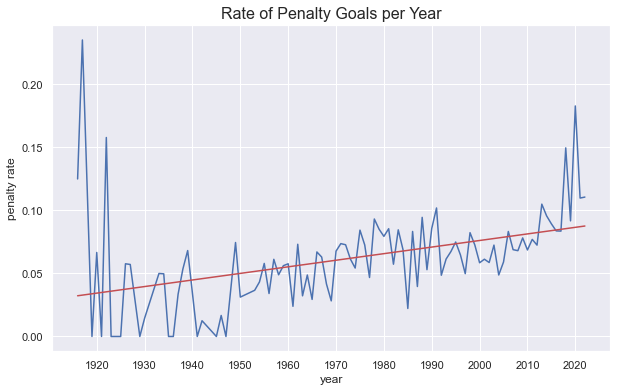

In [25]:
# Visualization
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=penalty_rate, x='year', y='rate')
plt.locator_params(axis='x', nbins=20)
ax.set_title("Rate of Penalty Goals per Year", size=16)
ax.set_ylabel("penalty rate")


# Add linear regression
result = linregress(penalty_rate.index, penalty_rate['rate'])

def f(x):
    return x*result.slope + result.intercept

min_value = penalty_rate.index[0]
max_value = penalty_rate.index[-1]
plt.plot((min_value, max_value), (f(min_value), f(max_value)), c='r')

# Show
plt.show()

## **2. What is the goal rate per year?**

### **Calculate the goal rate per year**

We can calculate the goal rate by dividing the total number of goals by the total number of matches in a given year. This calculation provides us with a quantifiable measure of the proportion of goals per year, giving insight into the scoring intensity and competitiveness of football matches during different periods.

Matches prior to 1930 have been excluded from the analysis due to their limited availability and a relatively smaller number of recorded games during that period. By focusing on matches from 1930 onwards, we can ensure a more comprehensive and reliable assessment of the goal rate, considering a larger sample size and a broader representation of football matches.

In [26]:
# All goals by year
total_goals = results.groupby(by='year')['total_goals'].sum()
# All matches by year
total_matches = results.year.value_counts()
# Goal rate by year
goal_rate = total_goals / total_matches
goal_rate = goal_rate.to_frame().reset_index()
goal_rate.rename(columns={'index': 'year', 0:'goal_rate'}, inplace=True)
# Remove matches before 1930
mask = goal_rate.year >= 1930
goal_rate = goal_rate[mask]
goal_rate

,year,goal_rate
58,1930,4.323232
59,1931,4.237113
60,1932,3.923077
61,1933,3.967742
62,1934,4.814815
...,...,...
147,2019,2.869078
148,2020,2.471572
149,2021,2.746556
150,2022,2.479781


### **Create the visualization**

Through this visualization, it becomes evident that the rate of goals has been gradually decreasing over the years. Several factors could contribute to this decline. One possibility is the improvement in defensive strategies and tactics employed by teams, leading to a more challenging environment for goal scoring. Additionally, advancements in goalkeeper training and equipment may have enhanced their ability to make crucial saves, resulting in fewer goals. Changes in playing styles, rule modifications, and variations in team formations could also influence the goal-scoring dynamics. Further analysis and exploration of these factors can provide valuable insights into the reasons behind the observed decrease in the goal rate over time.

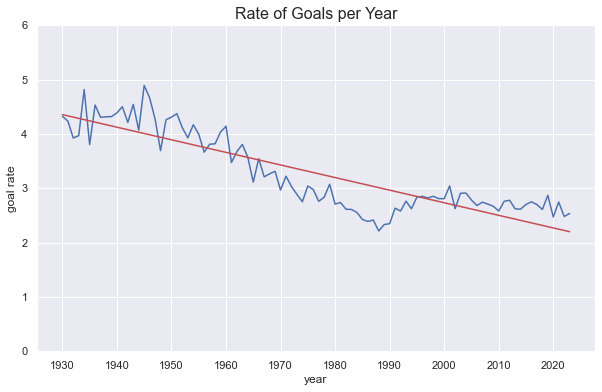

In [27]:
# Visualization
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=goal_rate, x='year', y='goal_rate')
plt.locator_params(axis='x', nbins=20)
ax.set_title("Rate of Goals per Year", size=16)
ax.set_ylabel("goal rate")

# Add linear regression
result = linregress(goal_rate.year, goal_rate.goal_rate)

def f(x):
    return x*result.slope + result.intercept

min_value = goal_rate.year.iloc[0]
max_value = goal_rate.year.iloc[-1]
plt.plot((min_value, max_value), (f(min_value), f(max_value)), c='r')
ax.set_yticks(list(range(0, 7)))

# Show
plt.show()

## **3. What is the rate of goals scored per minute during a match?**

**Observation:** Exclusion of extra time

For the purpose of this analysis, the dataset does not consider the extra time period that may occur during football matches. The focus is solely on the regular time of the matches, disregarding any additional time played beyond the regulation 90 minutes. By excluding extra time, we aim to analyze the performance and statistics within the standard duration of matches, providing insights specifically related to the regular game play.

### **Analyzing goals scored by Halftime**

Upon analyzing the data, it becomes evident that there is a higher number of goals scored during the second half of the matches. This observation indicates a trend towards increased goal-scoring activity in the latter part of the game.

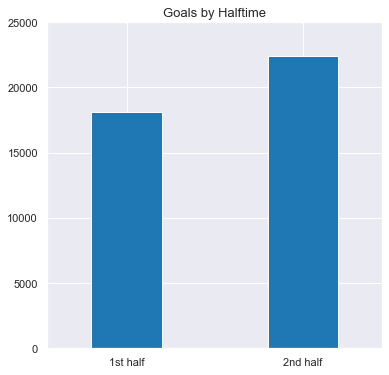

In [28]:
# Remove extra time goals
mask = goalscorers.minute <= 90
goals_per_minute = goalscorers[mask].copy()
goals_per_minute['half'] = goals_per_minute.minute.map(lambda x: '1st half' if x <= 45 else '2nd half')

# Visualization
fig = plt.figure(figsize=(6,6))
ax = goals_per_minute['half'].value_counts(ascending=True).plot(kind="bar", width=0.4, color='tab:blue')

# Altera o título
ax.set_title("Goals by Halftime", fontsize=13)

# Altera a Escala do eixo Y
ax.set_ylim([0, 25000])

# Deixa o Eixo X na horizontal e muda o mes para PT-BR
ax.set_xticklabels(labels=goals_per_minute['half'].value_counts().index[::-1], rotation=0, ha='center')


# Show
plt.show()

### **Analyzing the data distribution in 10-minute intervals.**

Based on our analysis, it becomes apparent that there is an increase in the number of goals scored during the late minutes of the match, indicating a higher scoring rate towards the end of the game. However, upon further examination, an interesting pattern emerges, revealing a higher frequency of goals scored during the 80-90 minute interval.

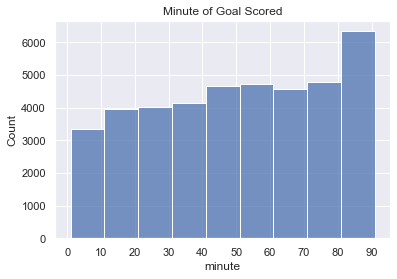

In [29]:
# Remove extra time goals
mask = goalscorers.minute <= 90
goals_per_minute = goalscorers[mask]

# Visualization
plt.locator_params(axis='x', nbins=10)
ax = sns.histplot(goals_per_minute, x='minute', binwidth=10, )
ax.set_title("Minute of Goal Scored")

# Show
plt.show()

### **Analyzing the data distribution in 1-minute intervals.**

In order to address this question, we conducted an analysis by examining the data distribution in 1-minute intervals. Our analysis revealed two significant anomalies in the data. During the 45th and 90th minutes, there is a substantial increase in the number of goals scored compared to the other minutes. This occurrence is primarily due to the rule where referees indicate in the match report that goals scored during overtime should be attributed to the 45th minute or 90th minute, respectively, depending on the half of the match.

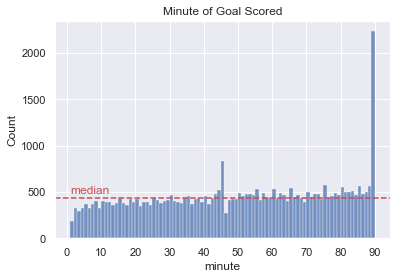

In [70]:
# Remove extra time goals
mask = goalscorers.minute <= 90
goals_per_minute = goalscorers[mask]

# Visualization
plt.locator_params(axis='x', nbins=10)
ax = sns.histplot(goals_per_minute, x='minute', binwidth=1)
ax.set_title("Minute of Goal Scored")

# Add a line to indicate the median value
median = goals_per_minute['minute'].value_counts().median()
ax.axhline(median, color='r', ls='--')
ax.annotate("median", xy=(1, median+50), color='r')

# Show
plt.show()

## **4. Which team has the highest number of penalty shootout victories?**

### **Calculate the absolute frequency of teams who played the most penalty shootouts**

We can calculate the absolute frequency of teams that have participated in the highest number of penalty shootouts.

In [31]:
# Calculate the absolute frequency
shootouts_rate_domain = shootouts.home_team.value_counts().add(shootouts.away_team.value_counts(), fill_value=0)
# Filter low result
shootouts_rate_domain = shootouts_rate_domain.to_frame().reset_index()
shootouts_rate_domain.rename(columns={'index': 'country', 0:'total_penalties'}, inplace=True)
shootouts_rate_domain.sort_values(by='total_penalties', ascending=False, inplace=True)
shootouts_rate_domain.head()

,country,total_penalties
200,Zambia,24.0
165,South Korea,23.0
164,South Africa,23.0
5,Argentina,22.0
51,Egypt,22.0


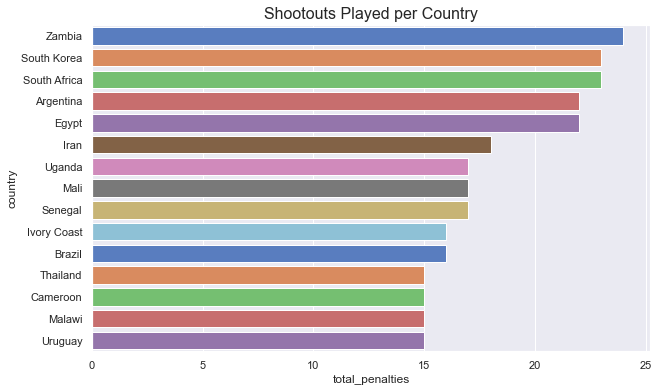

In [32]:
# Visualization
plt.figure(figsize=(10,6))
ax = sns.barplot(data=shootouts_rate_domain.head(15), x='total_penalties', y='country', palette='muted')
ax.set_title("Shootouts Played per Country", size=16)


# Show
plt.show()

### **Calculate the absolute frequency of teams who won the most penalty shootouts**

We can calculate the absolute frequency of teams that have won the highest number of penalty shootouts.

In [33]:
# Calculate absolute frequency of wins
shootouts_count = shootouts.winner.value_counts().to_frame().reset_index()
shootouts_count.rename(columns={'index': 'country'}, inplace=True)
shootouts_count.head()

,country,winner
0,Argentina,14
1,South Korea,13
2,Egypt,13
3,Zambia,13
4,South Africa,11


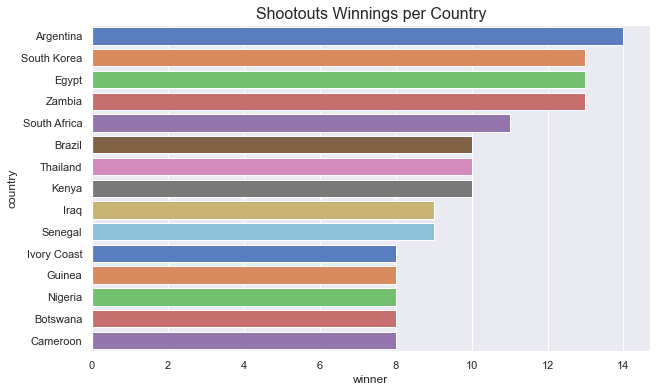

In [34]:
# Visualization
plt.figure(figsize=(10,6))
ax = sns.barplot(data=shootouts_count.head(15), x='winner', y='country', palette='muted')
ax.set_title("Shootouts Winnings per Country", size=16)


# Show
plt.show()

## **5. What is the impact of playing at home on the final match outcome?**

### **Analysing by match result**

Through this analysis, a clear advantage can be observed for the home team, as depicted by the higher frequency displayed in the graph. This suggests that playing on home turf provides a favorable condition that increases the likelihood of a positive outcome for the home team.

To ensure a more accurate assessment, matches played on neutral grounds were excluded from this analysis.

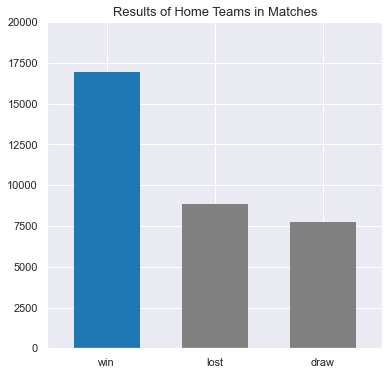

In [37]:
# Return result by goal diference
def result(goal_dif):
    # return 0 to lost
    if goal_dif < 0:
        return 'lost'
    # return 0.5 to draw
    elif goal_dif == 0:
        return 'draw'
    # return 1 to win
    return 'win'

# Remove neutral ground matches
mask = results['neutral'] == False
results_by_home = results[mask].copy()
results_by_home['home_win'] = results_by_home.goal_dif.map(result)

# Visualization
fig = plt.figure(figsize=(6,6))
ax = results_by_home['home_win'].value_counts(ascending=False).plot(kind="bar", width=0.6)

# Altera o título
ax.set_title("Results of Home Teams in Matches", fontsize=13)

# Altera a Escala do eixo Y
ax.set_ylim([0, 20000])

# Deixa o Eixo X na horizontal e muda o mes para PT-BR
ax.set_xticklabels(labels=results_by_home['home_win'].value_counts().index, rotation=0, ha='center')

# Change bar color
for color, bar in zip(['tab:blue', 'gray','gray'], ax.patches):
     bar.set_color(color)

# Show
plt.show()

### **Analysing by match results in major tournaments**

In this analysis, we examine match results in major tournaments, with a particular focus on the influence of playing at home. By analyzing the data, it becomes evident that there is a consistent advantage for the home team. The results consistently demonstrate a higher frequency of victories for the home team compared to the away team. This finding underscores the significance of home-field advantage in major tournaments, where the support of home fans and familiarity with the surroundings can provide a boost to the performance and confidence of the home team.

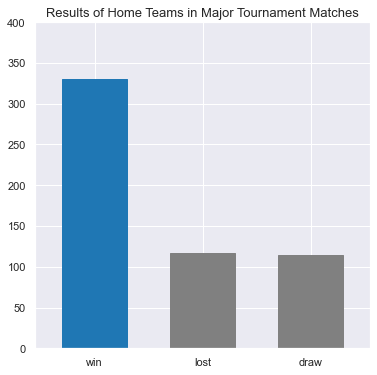

In [38]:
tournaments = ['FIFA World Cup', 'AFC Asian Cup', 'Africa Cup of Nations',
              'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
              'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
              'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']

# Remove neutral ground matches and consider only majors tournaments
mask = (results['neutral'] == False) & (results['tournament'].isin(tournaments))
results_by_home = results[mask].copy()
results_by_home['home_win'] = results_by_home.goal_dif.map(result)

# Visualization
fig = plt.figure(figsize=(6,6))
ax = results_by_home['home_win'].value_counts(ascending=False).plot(kind="bar", width=0.6)

# Altera o título
ax.set_title("Results of Home Teams in Major Tournament Matches", fontsize=13)

# Altera a Escala do eixo Y
ax.set_ylim([0, 400])

# Deixa o Eixo X na horizontal e muda o mes para PT-BR
ax.set_xticklabels(labels=results_by_home['home_win'].value_counts().index, rotation=0, ha='center')

# Change bar color
for color, bar in zip(['tab:blue', 'gray','gray'], ax.patches):
     bar.set_color(color)

# Show
plt.show()

### **Analysing by goals scored**

In this analysis, we delve into the goal-scoring dynamics across various matches, with a specific focus on examining the advantage of the home team. Through a comprehensive assessment of the data, a clear pattern emerges, indicating that the home team holds an advantage in terms of goal scoring. The statistical analysis consistently reveals a higher frequency of goals scored by the home team compared to the away team.

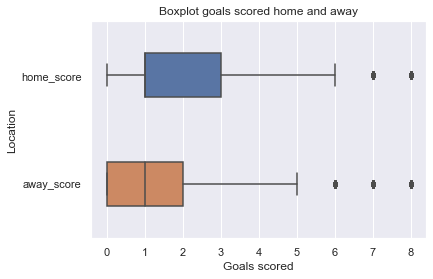

In [39]:
# Create copy of results DataFrame
match_score = results[['home_score', 'away_score', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 8 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_home = match_score.home_score > max_number_of_goals
mask_number_of_goals_away = match_score.away_score > max_number_of_goals

match_score.home_score = match_score.home_score.where(~mask_number_of_goals_home, max_number_of_goals)
match_score.away_score = match_score.away_score.where(~mask_number_of_goals_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score[['home_score', 'away_score']][mask_field],
            width=0.4, orient='h')
ax.set_ylabel("Location")
ax.set_xlabel("Goals scored")
ax.set_title("Boxplot goals scored home and away")

# Show
plt.show()

### **Analysing by goals scored in major tournaments**

In this analysis, we explore the goal-scoring patterns in major tournaments, specifically focusing on the influence of playing at home. The data reveals a noteworthy trend indicating that the home team enjoys an advantage in terms of goal-scoring. The statistics consistently demonstrate a higher frequency of goals scored by the home team compared to the away team.

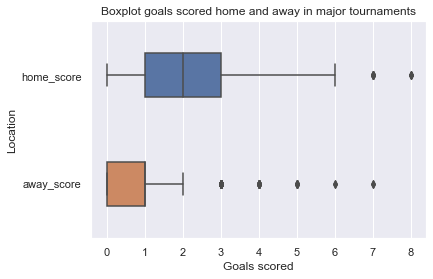

In [40]:
tournaments = ['FIFA World Cup', 'AFC Asian Cup', 'Africa Cup of Nations',
              'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
              'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
              'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']

# Create copy of results DataFrame
match_score = results[['home_score', 'away_score', 'neutral', 'tournament']].copy()

# Remove matches in neutral field for comparation
mask_field = (match_score.neutral == False) & (match_score.tournament.isin(tournaments))

# Simplifying the number of goals above 8 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_home = match_score.home_score > max_number_of_goals
mask_number_of_goals_away = match_score.away_score > max_number_of_goals

match_score.home_score = match_score.home_score.where(~mask_number_of_goals_home, max_number_of_goals)
match_score.away_score = match_score.away_score.where(~mask_number_of_goals_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score[['home_score', 'away_score']][mask_field],
            width=0.4, orient='h')
ax.set_ylabel("Location")
ax.set_xlabel("Goals scored")
ax.set_title("Boxplot goals scored home and away in major tournaments")

# Show
plt.show()

### **Analysing by goal difference**

In this analysis, we investigate the goal difference, a measure of the performance disparity between the home and away teams. Our focus is on examining the advantage of the home team based on this metric. By analyzing the data, a consistent trend emerges, indicating that the home team holds an advantage in terms of goal difference. The statistics consistently reveal a higher frequency of positive goal differences for the home team compared to the away team. This observation underscores the significance of playing on home turf, where teams often exhibit a stronger performance, leading to a greater goal differential in their favor. The data provides compelling evidence that playing at home contributes to a notable advantage in terms of goal difference, highlighting the importance of home-field advantage in football.

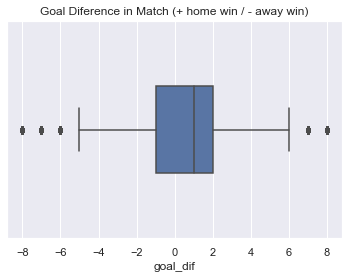

In [41]:
# Create copy of results DataFrame
match_score = results[['goal_dif', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 7 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_dif_home = match_score.goal_dif > max_number_of_goals
mask_number_of_goals_dif_away = match_score.goal_dif < -max_number_of_goals

match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_home, max_number_of_goals)
match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_away, -max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score[mask_field], x='goal_dif',
            width=0.4, orient='h')
ax.set_xlabel("goal_dif")
ax.set_title("Goal Diference in Match (+ home win / - away win)")

# Show
plt.show()

### **Analysing by goal difference in major tournaments**

In this analysis, we delve into the goal difference, a key indicator of performance, specifically focusing on major tournaments and examining the advantage of the home team. By meticulously analyzing the data, a consistent pattern emerges, clearly demonstrating that the home team enjoys a distinct advantage in terms of goal difference. The statistical analysis consistently showcases a higher frequency of positive goal differences for the home team compared to the away team in major tournaments. This finding underscores the significant impact of playing on home soil, where teams tend to exhibit stronger performances, resulting in a greater goal differential in their favor. The data provides compelling evidence that home-field advantage plays a crucial role in major tournaments, influencing the goal difference and ultimately contributing to the success of the home team.

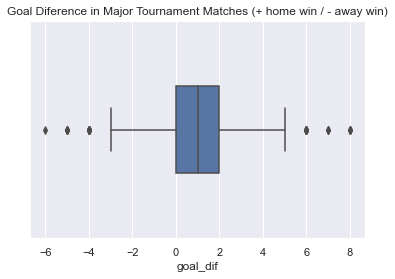

In [42]:
tournaments = ['FIFA World Cup', 'AFC Asian Cup', 'Africa Cup of Nations',
              'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
              'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
              'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']

# Create copy of results DataFrame
match_score = results[['goal_dif', 'neutral', 'tournament']].copy()

# Remove matches in neutral field for comparation
mask_field = (match_score.neutral == False) & (match_score.tournament.isin(tournaments))
match_score = match_score[mask_field]

# Simplifying the number of goals above 7 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_dif_home = match_score.goal_dif > max_number_of_goals
mask_number_of_goals_dif_away = match_score.goal_dif < -max_number_of_goals

match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_home, max_number_of_goals)
match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_away, -max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score, x='goal_dif', orient='h', width=0.4)
ax.set_xlabel("goal_dif")
ax.set_title("Goal Diference in Major Tournament Matches (+ home win / - away win)")

# Show
plt.show()

## **6. Which teams have the best historical performance?**

### **Creating Football Elo Ranking**

**Initial Explanation**

The Elo ranking system is designed to provide a numerical representation of the skill level of teams in competitive games. Each team is assigned an initial rating, which serves as a baseline measure of their ability.

The amount of points gained or lost in a match is determined by the difference in ratings between the two opponents. If the ratings are close, the impact on ratings will be minimal. However, if there is a significant rating difference, the outcome of the match can lead to more significant rating adjustments.

Over time, teams participate in more matches, their ratings become more accurate representations of their current skill levels. The Elo ranking system allows for comparisons and rankings based on these ratings, providing a framework for evaluating and comparing the performance of individuals or groups in a fair and objective manner.

**Apply to football**

We can apply the Elo rating system to international football, by adding a weighting for the kind of match, an adjustment for the home team advantage, and an adjustment for goal difference in the match result.

The ratings are based on the following formulas:

$Rn = Ro + G * K * (W - We)$

- $Rn$ is the new rating
- $Ro$ is the old (pre-match) rating.
- $G$ is a goal difference index
    - If $0$ or $1$: $G = 1$
    - If $2$: $G = ^3/_2$
    - If $3$ or more: $G = \frac{(11 + goaldif)}{8}$
- $K$ is the weight constant for the tournament played (We made an adjustmant from the reference):
    - 60 for World Cup Matches;
    - 50 for continental championships and major intercontinental tournaments;
    - 40 for World Cup qualifiers and major tournaments;
    - 30 for Continental qualifiers and major tournaments;
    - 20 for Friendly and other tournaments
- $W$ is the result of the game (1 for a win, 0.5 for a draw, and 0 for a loss).
- $We$ is the expected result (win expectancy), either from the chart or the following formula:
    - $We = \frac{1}{10^(\frac{-dr}{400}) + 1}$
    - $dr$ equals the difference in ratings plus 100 points for a team playing at home.
    
Reference: https://www.eloratings.net/about

### **Functions Implementations**

With these formulas and functions, we can calculate the changes in Elo rankings. 

In [43]:
# Return expected result probabilty
def expected_result(ranking_a, ranking_b, home_advantage):
    return 1 / (10**(-((ranking_a+home_advantage)-ranking_b)/400) + 1)

# Return result by goal diference
def result(goal_dif):
    # return 0 to lost
    if goal_dif < 0:
        return 0
    # return 0.5 to draw
    elif goal_dif == 0:
        return 0.5
    # return 1 to win
    return 1


# The number of goals is taken into account by use of a goal difference index
def goal_index(goal_dif):
    goal_dif = abs(goal_dif)
    if goal_dif <= 1:
        return 1
    elif goal_dif == 2:
        return 3/2
    else:
        return (11 + goal_dif) / 8


# Return tournament weight constant
def tournament_weight(tournament):
    # 60 points
    world_cup = 'FIFA World Cup'
    # 50 points
    continental = ['AFC Asian Cup', 'Africa Cup of Nations',
                  'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
                  'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
                  'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']
    # 40 points
    international_qualifiers_and_majors = ['UEFA Nations League', 'FIFA World Cup qualification',  
                                           'CONCACAF Nations League', 'African Nations Championship']
    # 30 points
    continental_qualifiers = ['UEFA Euro qualification', 'African Cup of Nations qualification', 'AFC Asian Cup qualification',
                              'Copa América qualification']
    # 20 points + others
    friendly = 'Friendly'
    
    if tournament == world_cup:
        return 60
    elif tournament in continental:
        return 50
    elif tournament in international_qualifiers_and_majors:
        return 40
    elif tournament in continental_qualifiers:
        return 30
    elif tournament == friendly:
        return 20
    else:
        return 20


# Calculate change of points
def points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100):
    g = goal_index(goal_dif)
    k = tournament_weight(tournament)
    w = result(goal_dif)
    we = expected_result(ranking_a, ranking_b, home_advantage)
    return g * k * (w - we)


# Return a tuple with the ranking of A and the ranking of B
def elo(ranking_a, ranking_b, goal_dif, tournament, neutral):
    
    if neutral:
        points = points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    else:
        points = points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)
    
    return ranking_a + points, ranking_b - points

### **Data Processing**

By processing the data and applying the Elo ranking calculations, we can generate a comprehensive data frame that captures the Elo ranking of each team over the years. This data frame will provide valuable insights into the relative performance and fluctuations of teams' rankings across different tournaments and matches. Analyzing the Elo rankings over time enables us to observe trends, identify teams with consistent success, and gain a deeper understanding of the dynamics of team performance in the world of football.

In [44]:
# Assigning default rating of 1500 to each team
unique_team_list = np.unique(pd.concat([results.home_team,
                                        results.away_team], ignore_index=True))
rating_dict = {team:1500 for team in unique_team_list}
# Assign each year of dataset
year_list = results.year.unique()
year_dict = dict()

# Itarate years to calculate elo ranking
for year in year_list:
    # Select mask with year of the iteration
    mask = results['year'] == year
    results_temp = results[mask][['home_team', 'away_team', 'goal_dif', 'tournament', 'neutral']]
    
    # Iterate dataframe to calculate elo ranking changes
    for index, row in results_temp.iterrows():
        
        # Get home and away teams names
        home_team = row.home_team
        away_team = row.away_team
        
        # Get other informations
        goal_dif = row.goal_dif
        tournament = row.tournament
        neutral = row.neutral
        
        # Get home and away teams scores
        home_team_score = rating_dict[home_team]
        away_team_score = rating_dict[away_team]
        
        # Calculate new scores according to result of the match
        home_team_score, away_team_score = elo(home_team_score, away_team_score, goal_dif, tournament, neutral)
        
        # Assign new scores
        rating_dict[home_team] = home_team_score
        rating_dict[away_team] = away_team_score

    # Transform rating_dict into DataFrame
    year_dict[year] = rating_dict.copy()

country_ranking = pd.DataFrame.from_dict(year_dict)
country_ranking = country_ranking.reset_index().rename(columns={'index': 'country'})
country_ranking.head(10)

,country,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Abkhazia,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1495.933727,1495.933727,1541.988144,1536.597870,1573.682634,1590.633376,1590.633376,1590.633376,1590.633376,1590.633376
1,Afghanistan,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1285.742074,1309.722983,1313.441091,1321.562707,1314.735193,1310.864965,1310.864965,1315.257412,1279.155143,1279.155143
2,Albania,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1607.064865,1630.177782,1596.914714,1624.582143,1536.531153,1551.969675,1576.881358,1607.633618,1569.770664,1566.368467
3,Alderney,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1399.481222,1355.675185,1355.675185,1343.731168,1343.731168,1336.859702,1336.859702,1336.859702,1336.859702,1336.859702
4,Algeria,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1740.572990,1738.971650,1710.647093,1652.414608,1614.162237,1741.221947,1756.721522,1818.896327,1796.483943,1800.388304
5,American Samoa,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1123.205327,1185.165698,1185.165698,1185.165698,1185.165698,1207.543536,1207.543536,1207.543536,1207.543536,1207.543536
6,Andalusia,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183,1587.157183
7,Andorra,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1041.567293,1023.600047,1022.947597,1058.356511,1125.184458,1140.057029,1071.314510,1099.389072,1160.183235,1169.472157
8,Angola,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1542.740909,1530.027782,1397.290132,1418.532484,1480.679488,1480.748509,1498.129466,1492.431332,1522.151639,1522.266194
9,Anguilla,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1095.136445,1056.417707,1043.499445,1043.499445,1044.245570,992.299269,992.299269,961.997763,979.026973,969.834191


### **Adding features**

To enhance our data frame, we sourced the country confederation information from the [FIFA Countries Audience Dataset](https://raw.githubusercontent.com/fivethirtyeight/data/master/fifa/fifa_countries_audience.csv), and the shortcode data from [ISO-3166-Countries-with-Regional-Codes]('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'). By merging these datasets with our Elo ranking data, we now have a comprehensive data frame that includes country, confederation, and shortcode information. This enriched data frame significantly aids visualization and analysis, allowing us to examine team performances within their respective confederations, compare countries using their shortcodes, and gain deeper insights into the relationships between Elo rankings and country attributes.

In [45]:
# Add country confederation
country_confederation = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fifa/fifa_countries_audience.csv')
country_confederation_country = np.array(country_confederation.country)
country_confederation_confed = np.array(country_confederation.confederation)
country_confederation_dict = dict(zip(country_confederation_country, country_confederation_confed))
country_confederation_dict['England'] = 'UEFA'
country_confederation_dict['Scotland'] = 'UEFA'
country_ranking['confederation'] = country_ranking['country'].apply(lambda x : country_confederation_dict.get(x))
country_ranking.confederation.fillna('Not Found', inplace=True)

# Add country shortcode
country_shortcode = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
country_code_name = np.array(country_shortcode.name)
country_code_alpha = np.array(country_shortcode['alpha-2'])
country_code_dict = dict(zip(country_code_name, country_code_alpha))
country_ranking['code'] = country_ranking['country'].apply(lambda x : country_code_dict.get(x))
country_ranking.code = ':' + country_ranking.code.str.lower() + ':'
country_ranking[['country', 2023, 'confederation', 'code']].head()

,country,2023,confederation,code
0,Abkhazia,1590.633376,Not Found,NaN
1,Afghanistan,1279.155143,AFC,:af:
2,Albania,1566.368467,UEFA,:al:
3,Alderney,1336.859702,Not Found,NaN
4,Algeria,1800.388304,CAF,:dz:


### **Top 15 Elo Ranking Teams with Confederation**

This visualization showcases the current top teams and their confederations. Argentina and Brazil emerge as the leading teams, followed by a strong presence of European teams. In total, we observe 9 European teams, 4 South American teams, and representation from CAF (Morocco) and AFC (Japan). This highlights the dominance of European and South American teams in the Elo ranking.

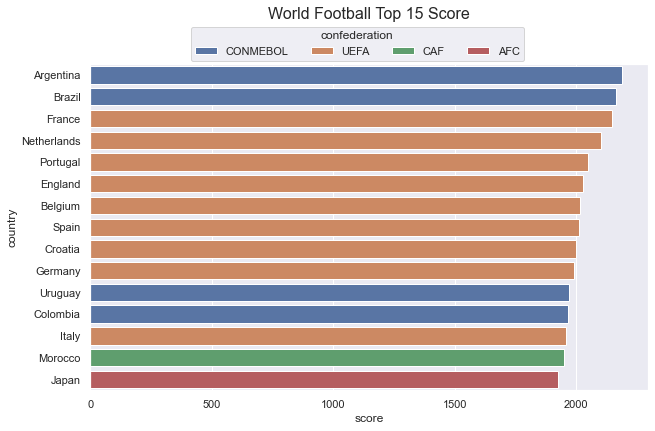

In [46]:
# Visualization
plt.figure(figsize=(10,6))
ax = sns.barplot(data=country_ranking.sort_values(by=2023, ascending=False).head(15), x=2023, y='country', hue='confederation', dodge=False)
ax.set_title("World Football Top 15 Score", y=1.12, size=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.17, 1.132), ncol=4)
ax.set_xlabel("score")

# Show
plt.show()

### **Using k-means algorithm to determine the best and worst teams in history.**

The k-means algorithm is commonly used in data clustering to group similar data points together based on their features or attributes. In the context of Elo rankings, applying the k-means algorithm allows us to categorize teams into distinct clusters based on their performance similarities.

By setting the value of k (the number of clusters) to 5, we were able to identify five distinct groups:

1. Best teams: This cluster comprises the top-performing teams with consistently high Elo rankings.
2. Good teams: These teams exhibit above-average performance but may have slightly lower Elo rankings compared to the best teams.
3. Average teams: This cluster consists of teams with moderate performance and Elo rankings.
4. Bad teams: Teams in this cluster have below-average performance and lower Elo rankings.
5. Worst teams: This cluster represents the lowest-performing teams with the lowest Elo rankings.

Additionally, it is interesting to note that all the champions and runners-up of the FIFA World Cup, with the exception of Croatia, were grouped in the best teams cluster. This indicates that the k-means algorithm successfully identifies teams with outstanding performances and recognizes their achievements in major tournaments.

In [47]:
# Select numeric columns and change type of column name
teste = country_ranking.iloc[:, 1:-2].copy()
teste.columns = teste.columns.astype(str)

#### **Group Visualization (K = 2)**

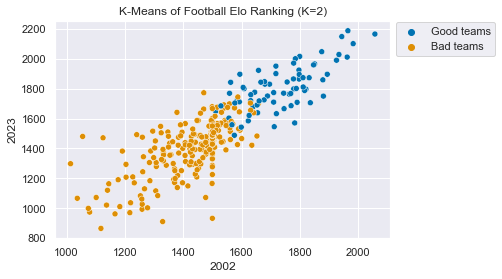

In [48]:
kmeans_elo = KMeans(n_clusters=2, n_init=20, random_state=MYSEED)
kmeans_elo.fit(teste)
ax = sns.scatterplot(data=teste, y='2023', x='2002', hue=kmeans_elo.labels_, palette="colorblind")
ax.set_title("K-Means of Football Elo Ranking (K=2)")

lgnd_labels = ['Good teams', 'Bad teams']
lgnd_handles, _ = ax.get_legend_handles_labels()

ax.legend(lgnd_handles, lgnd_labels, fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))

plt.show()

#### **Group Visualization (K = 3)**

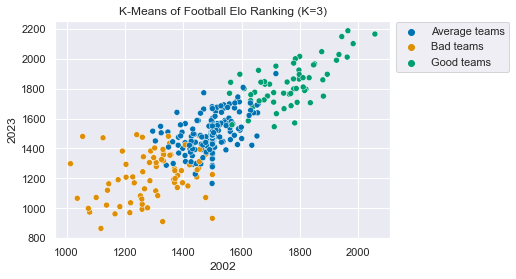

In [88]:
kmeans_elo = KMeans(n_clusters=3, n_init=20, random_state=MYSEED)
kmeans_elo.fit(teste)
ax = sns.scatterplot(data=teste, y='2023', x='2002', hue=kmeans_elo.labels_, palette="colorblind")
ax.set_title("K-Means of Football Elo Ranking (K=3)")

lgnd_labels = ['Average teams', 'Bad teams', 'Good teams']
lgnd_handles, _ = ax.get_legend_handles_labels()

ax.legend(lgnd_handles, lgnd_labels, fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))

plt.show()

#### **Group Visualization (K = 4)**

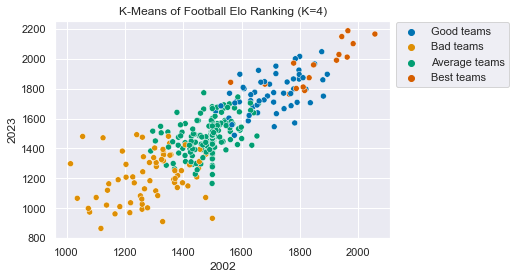

In [87]:
kmeans_elo = KMeans(n_clusters=4, n_init=20, random_state=MYSEED)
kmeans_elo.fit(teste)
ax = sns.scatterplot(data=teste, y='2023', x='2002', hue=kmeans_elo.labels_, palette="colorblind")
ax.set_title("K-Means of Football Elo Ranking (K=4)")

lgnd_labels = ['Good teams', 'Bad teams', 'Average teams', 'Best teams']
lgnd_handles, _ = ax.get_legend_handles_labels()

ax.legend(lgnd_handles, lgnd_labels, fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))

plt.show()

#### **Group Visualization (K = 5)**

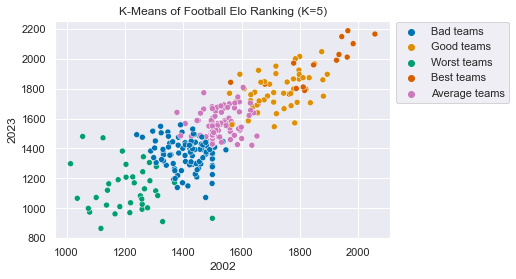

In [89]:
kmeans_elo = KMeans(n_clusters=5, n_init=20, random_state=MYSEED)
kmeans_elo.fit(teste)
ax = sns.scatterplot(data=teste, y='2023', x='2002', hue=kmeans_elo.labels_, palette="colorblind")
ax.set_title("K-Means of Football Elo Ranking (K=5)")

lgnd_labels = ['Bad teams', 'Good teams', 'Worst teams', 'Best teams', 'Average teams']
lgnd_handles, _ = ax.get_legend_handles_labels()

ax.legend(lgnd_handles, lgnd_labels, fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))

plt.show()

#### **Show best teams names**

In [52]:
country_ranking[['country', 'confederation']][kmeans_elo.labels_ == 3]

,country,confederation
12,Argentina,CONMEBOL
38,Brazil,CONMEBOL
74,Czechoslovakia,Not Found
85,England,UEFA
96,France,UEFA
104,Germany,UEFA
124,Hungary,UEFA
134,Italy,UEFA
187,Netherlands,UEFA
226,Russia,UEFA


### **Bonus - Flourish Visualization (Elo Ranking)**

The flourish software was used to make a bar chart race of the elo ranking score over the years.

You can acess the visualization running the cell bellow or clicking on the following link:

- **https://public.flourish.studio/visualisation/13571359/?utm_source=embed&utm_campaign=visualisation/13571359**

In [53]:
%%HTML
<iframe src='https://flo.uri.sh/visualisation/13571359/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/13571359/?utm_source=embed&utm_campaign=visualisation/13571359' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>

## **7. What is the distribution of goals scored during major international tournaments?**

### **Analysing all tournaments**

From the graph, we can observe a significant presence of outliers in the total number of goals scored per match.

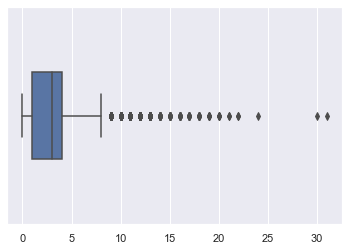

In [66]:
average_general_goals = results[['home_score', 'away_score']].sum(axis=1)

sns.boxplot(x=average_general_goals, orient='h', width=0.4)

plt.show()

### **Analysing all tournaments (simplification)**

To enhance data visualization, goals exceeding 12 were capped at 12. This adjustment allows for a clearer representation of the data without the influence of extreme outliers.

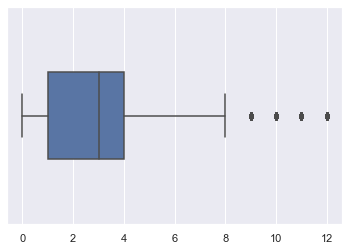

In [90]:
average_general_goals = results[['home_score', 'away_score']].sum(axis=1)

max_number_of_goals = 12
mask_number_of_goals = average_general_goals > max_number_of_goals

average_general_goals = average_general_goals.where(~mask_number_of_goals, max_number_of_goals)

sns.boxplot(x=average_general_goals, orient='h', width=0.4)

plt.show()

### **Analysing Major Tournaments**

We can observe a similar distribution pattern between the boxplots of major tournaments and all tournaments. However, it is worth noting that the boxplot of all tournaments exhibits a larger number of significant outliers in comparison.

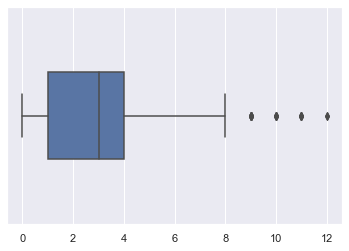

In [91]:
tournaments = ['FIFA World Cup', 'AFC Asian Cup', 'Africa Cup of Nations',
              'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
              'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
              'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']

average_international_goals = results.loc[results['tournament'].isin(tournaments)]
average_international_goals = average_international_goals[['home_score', 'away_score']].sum(axis=1)

sns.boxplot(x=average_international_goals, orient='h', width=0.4)

plt.show()

# **Conclusion**

## **Summary**

- Upon analyzing the dataset, it was observed that the frequency of penalty goals scored per year has shown an upward trend, in contrast to the declining frequency of regular goals scored per year. 

- Interestingly, the median time at which goals are scored during matches has remained relatively consistent over time.

- Furthermore, it becomes evident that the home-field advantage has a significant impact on the final outcome of matches. 

- By considering the performance history of each team, it is possible to identify their best and worst performances within their respective confederations, as well as the best and worst teams in history using the k-means algorithm. 

- Additionally, it is feasible to observe the distribution of goals scored in major international matches through the boxplot graph.

## **Importance**

- Allows us to assess the trend of goals during penalty shootouts and regular matches over the years.
- Examines the behavior of goals scored during added time in matches.
- Provides insights into the best-performing teams in penalty shootouts.
- Highlights the significance of playing at home for team performance.
- Concludes the top teams in each confederation.
- Examines the distribution of goals during major international tournaments and considers the impact of non-official matches on this distribution.

## **Limitations**


There are some limitations in this project that should be taken into consideration:

1. Absence of relevant data: The dataset used in this project lacks important information such as ball possession, dribbles, passes made, shots taken, counterattacks, and more.

2. Difficulty in applying correlation statistics: Due to the absence of certain data points, it was challenging to calculate and interpret correlations between variables accurately. Correlation analysis is a valuable tool in understanding the relationships between different factors in football matches, but the lack of comprehensive data limits its application in this project.

3. Incomplete data in the goalscorers file: During the visualization of the goalscorers graph in previus step of the project, it became evident that the goalscorers dataset is incomplete for certain matches.

## **Improvements**

There are several potential areas for improvement in this project for future iterations:

1. Access more comprehensive datasets: To enhance the analysis and insights derived from the project, it would be beneficial to explore datasets that provide additional statistics such as ball possession, dribbles, passes, shots, and counterattacks. Having access to a broader range of data would enable a more detailed examination of various aspects of the game and facilitate more comprehensive statistical analyses.

2. Enhance relevance and accuracy: As the project covers a significant number of tournaments, ensuring the relevance and accuracy of the analysis is crucial. Future improvements could involve conducting a meticulous review of the tournaments included, ensuring they reflect the current football landscape and considering the significance of each tournament in relation to the research objectives. This would help to ensure that the findings are applicable and meaningful within the context of contemporary football.

3. Implement machine learning techniques: Explore the application of machine learning algorithms to predict match outcomes or other relevant metrics. This would allow for the development of predictive models that can assist in forecasting match results or identifying key factors that contribute to team success.

By implementing these improvements, future iterations of the project can provide more comprehensive insights, conduct in-depth statistical analyses, and offer a more nuanced understanding of team performances across various tournaments and statistical dimensions.